# Exploratory Data Analysis on Google Quick Draw Dataset
This notebook performs EDA on the Quick Draw .png dataset organized in `data/<category_name>/` directories.

## Important Information from the Documentation
We know from the documentation of the dataset that:

- There are 50 million images distributed roughly equally among 345 categories.
- The images come from this process:
    - Align the drawing to the top-left corner, to have minimum values of 0.
    - Uniformly scale the drawing, to have a maximum value of 255.
    - Resample all strokes with a 1 pixel spacing.
    - Simplify all strokes using the Ramer–Douglas–Peucker algorithm with an epsilon value of 2.0.
    - Scale down to 28x28 and align to the center.
- The original vector images are expressed in JSON format with the following shape:
```python
[ 
  [  // First stroke 
    [x0, x1, x2, x3, ...],
    [y0, y1, y2, y3, ...]
  ],
  [  // Second stroke
    [x0, x1, x2, x3, ...],
    [y0, y1, y2, y3, ...]
  ],
  ... // Additional strokes
]

In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
# Para mostrar gráficos inline
%matplotlib inline

In [2]:
# Define categories
data_dir = Path('../data')
categories = [p.name for p in data_dir.iterdir() if p.is_dir()]
print(f'Found {len(categories)} categories:')
print(categories)

Found 10 categories:
['clock', 'house', 'bicycle', 'airplane', 'tree', 'car', 'cat', 'apple', 'dog', 'face']


In [3]:
# Count images in each category
counts = {}
for cat in categories:
    counts[cat] = len(list((data_dir / cat).glob('*.png')))
df_counts = pd.DataFrame(list(counts.items()), columns=['category', 'count']).sort_values(by='count', ascending=False)

In [4]:
# Show 20 first categories
df_counts.head(20)

,category,count
0,clock,1000
1,house,1000
2,bicycle,1000
3,airplane,1000
4,tree,1000
5,car,1000
6,cat,1000
7,apple,1000
8,dog,1000
9,face,1000


<Figure size 1200x600 with 0 Axes>

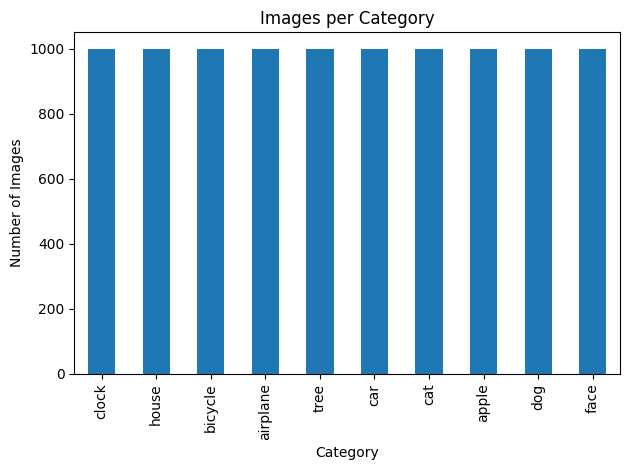

In [5]:
# Plot number of images per category
plt.figure(figsize=(12,6))
df_counts.plot.bar(x='category', y='count', legend=False)
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Images per Category')
plt.tight_layout()

## Sample Images
Look into the files to understand the format used.

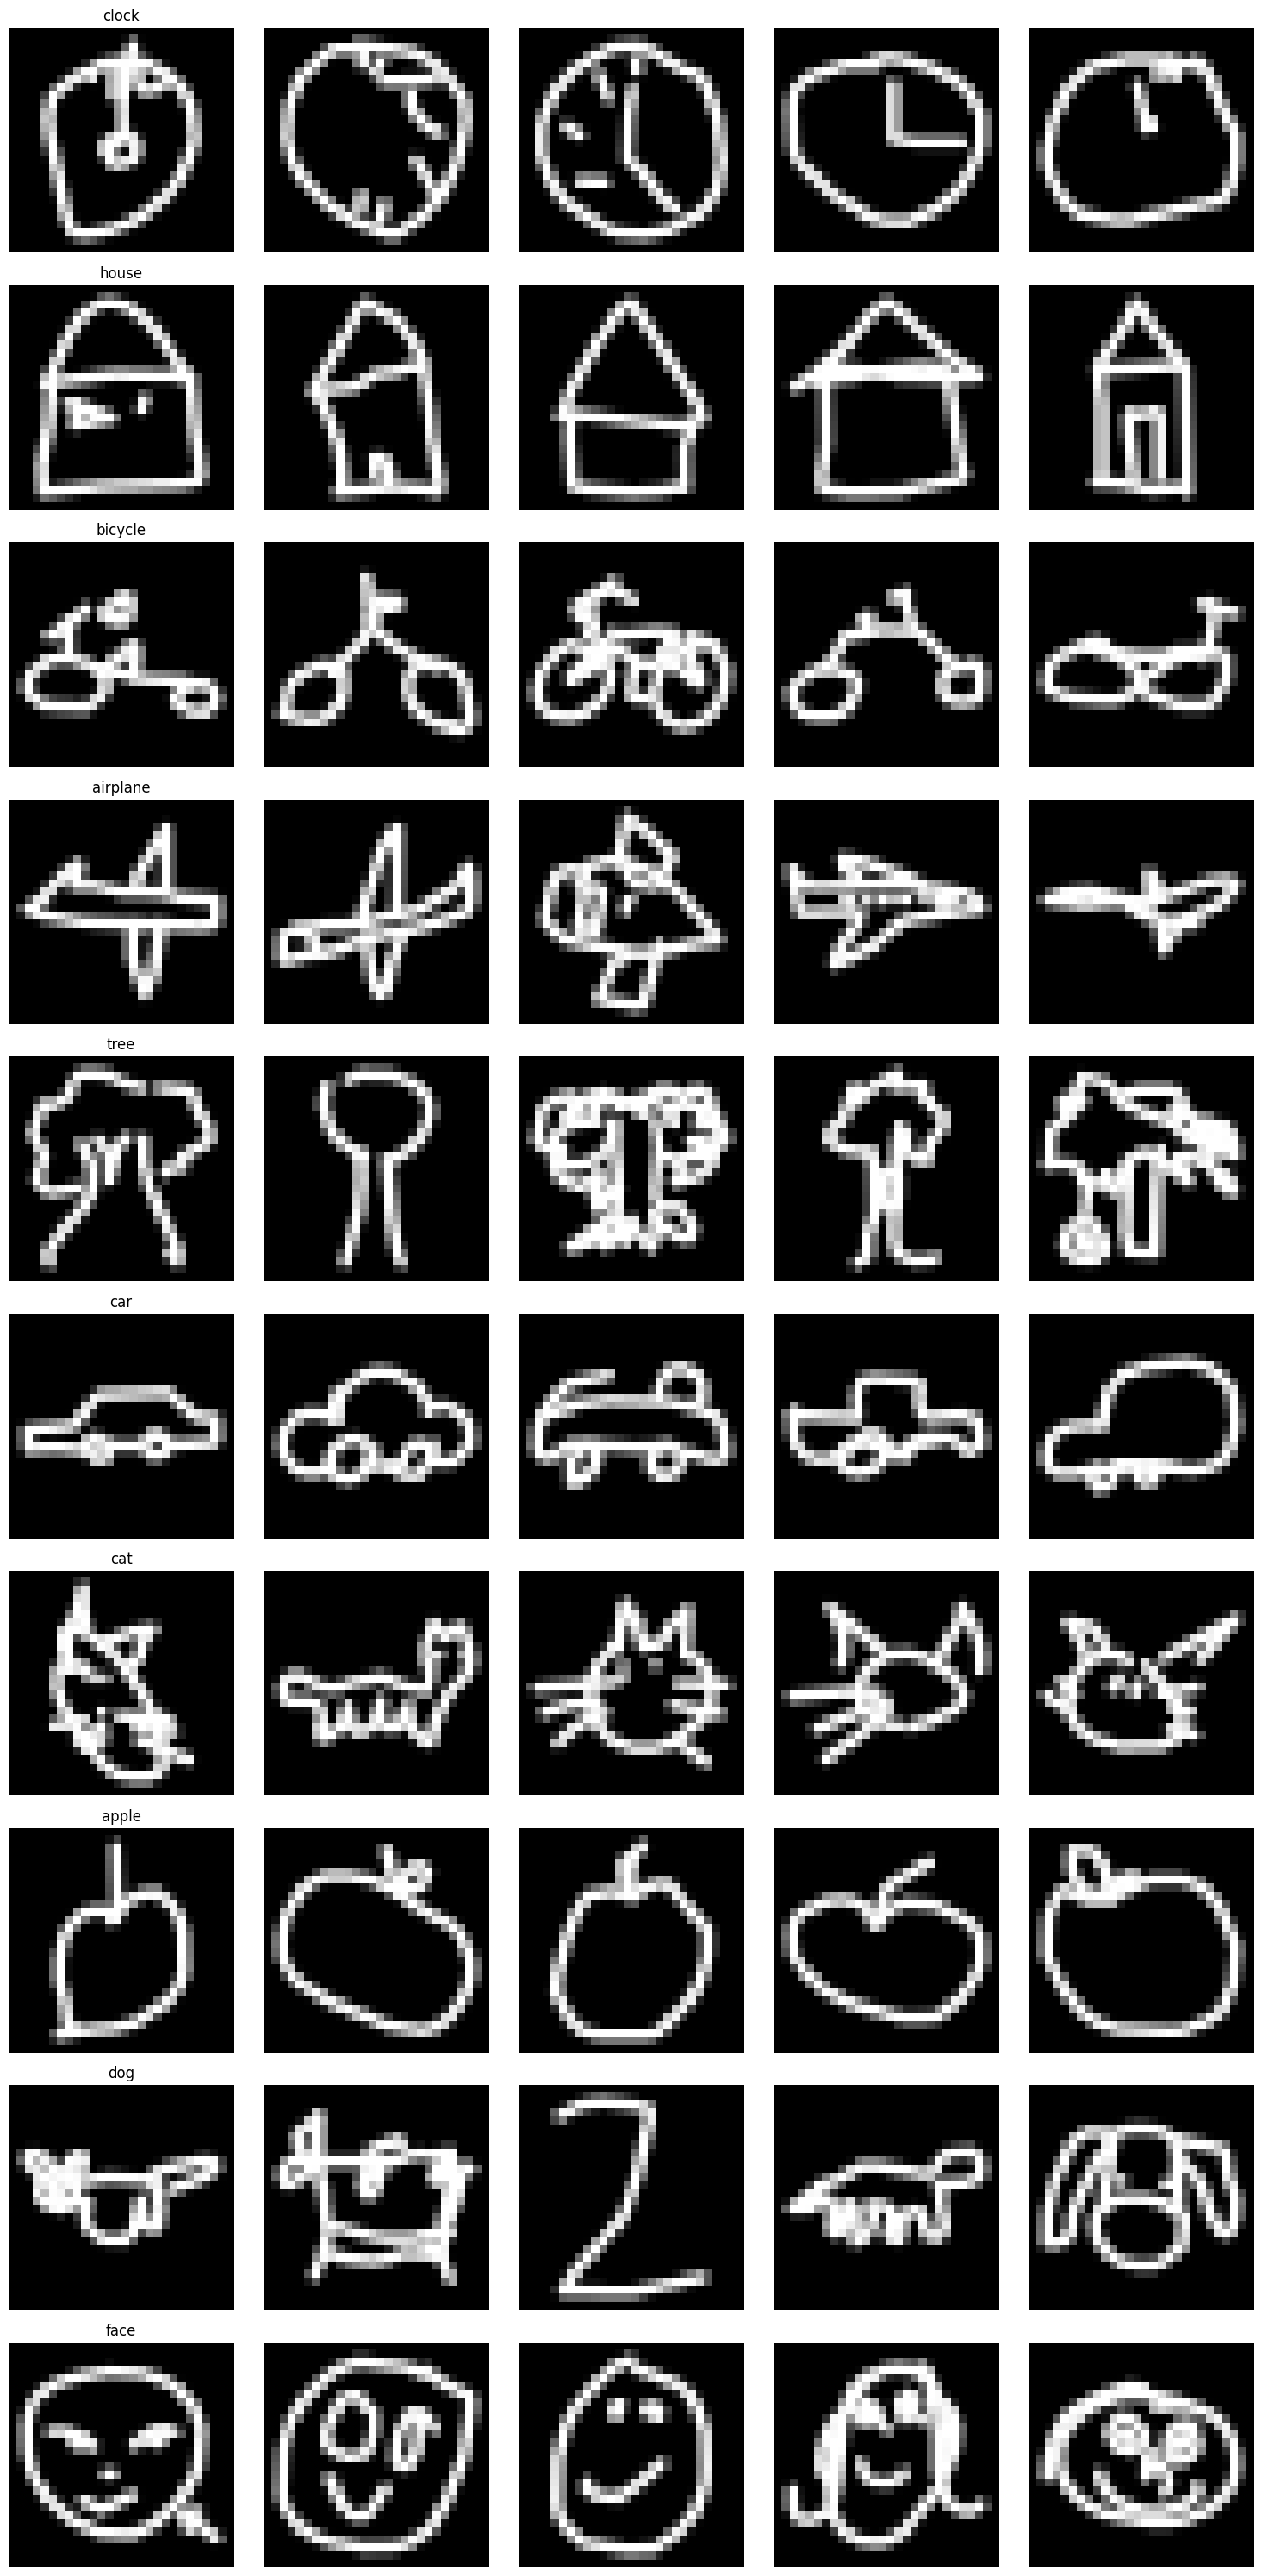

In [6]:
import random
plt.figure(figsize=(15, 30))
for row, cat in enumerate(categories):
    img_paths = list((data_dir/cat).glob('*.png'))
    samples = random.sample(img_paths, 5)
    for col, img_path in enumerate(samples):
        ax = plt.subplot(len(categories), 5, row*5 + col + 1)
        ax.imshow(Image.open(img_path), cmap='gray')
        ax.axis('off')
        if col == 0:
            ax.set_title(cat)
plt.tight_layout()


## Image Dimensions
Analyze the distribution of image widths and heights.

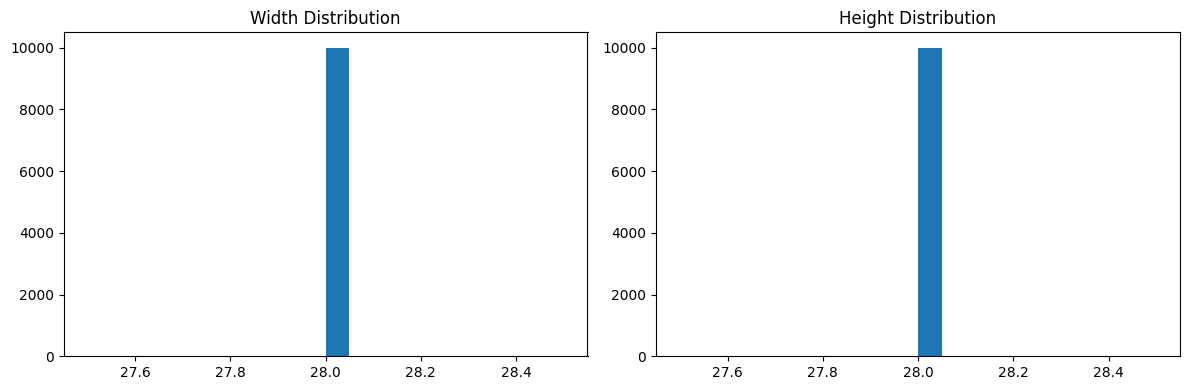

In [7]:
widths, heights = [], []
for cat in categories:
    for img_path in (data_dir/cat).glob('*.png'):
        img = Image.open(img_path)
        w, h = img.size
        widths.append(w)
        heights.append(h)

# Plot histograms
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(widths, bins=20)
plt.title('Width Distribution')
plt.subplot(1,2,2)
plt.hist(heights, bins=20)
plt.title('Height Distribution')
plt.tight_layout()

## Conclusions
- All images are of the same size (28x28 px).
- The drawings are centered in the area of the image with a 1px frame at the edges.
- The drawings are grayscale with a background of value 0.

We will need to reconstruct this image format faithfully if we want to run good predictions on new data